In [2]:
import pandas as pd
import os
import parse
import matplotlib.pyplot as plt
import numpy as np

(0.0, 8000.0)

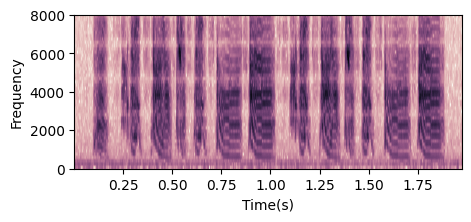

In [138]:
from scipy.io import wavfile
import seaborn as sns
motif_wav = '0oq8ifcb.wav'
samplingFrequency, signalData = wavfile.read(motif_wav)
cmap = sns.cubehelix_palette(dark=0,light=2,as_cmap=True)
location = [0,8000]
figure, ax = plt.subplots(figsize=(5, 2))
plt.specgram(signalData,Fs=samplingFrequency,cmap=cmap)
plt.ylabel('Frequency', size = 10)
plt.xlabel ('Time(s)', size = 10)
plt.ylim(ymin=0,ymax=8000)
# ax.yticks(location)
# ax.set_yticklabels(location,size=12)
# ax.set_title(zt)
# ax.set_xlabel('Firing Rate')
# ax.set_ylabel('Stimuli')
# plt.show()

In [65]:
def parse_stimuli (stimulus):
    stimulus_parser = parse.compile("{foreground}-{sdB:d}_{background}-{snl:d}")
    parse_result = stimulus_parser.parse(stimulus)
    singlemotif = parse_result.named['foreground']
    background = parse_result.named['background']
    sdB = parse_result.named['sdB']
    snl = parse_result.named['snl']
    SNR = snl - sdB
    return singlemotif, sdB, background, snl, SNR

/tmp/ipykernel_1751145/1715510848.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/1715510848.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/1715510848.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

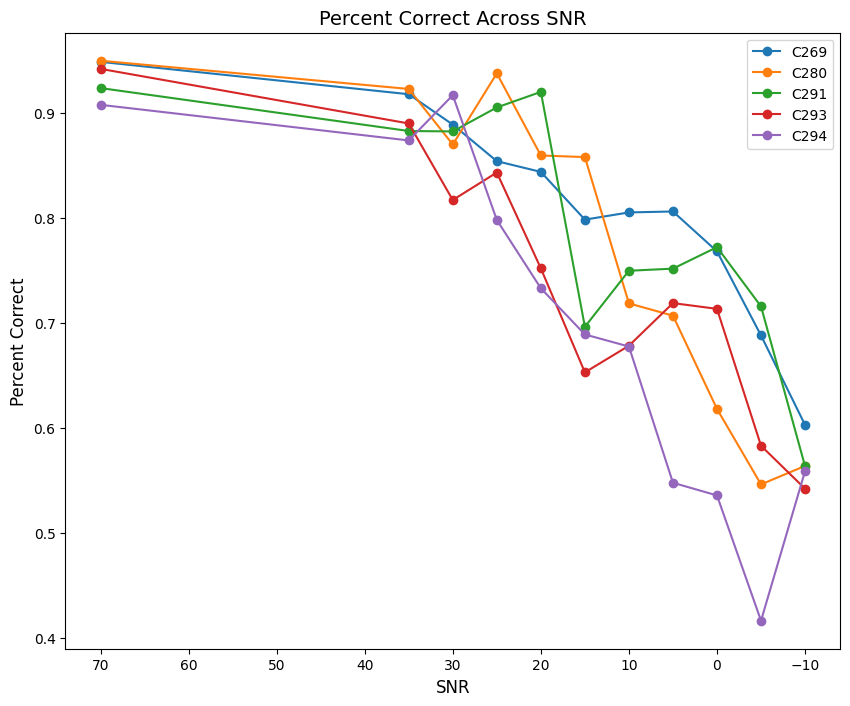

In [99]:
figure, ax = plt.subplots(figsize=(10, 8))
birds = ['C269','C280','C291', 'C293', 'C294']
probe_plotting_data = pd.DataFrame()
for idx, i in enumerate(birds):
    fulldf = pd.read_csv (i+'.csv')
    mask = fulldf['experiment'].str.contains('2ac-probe')
    data = fulldf[mask]
    smalldf = data[['subject','correct','response','stimulus', 'correction', 'time']]
    SNRdict = smalldf
    motif = []
    background = []
    sdB = []
    snl = []
    SNR = []
    for i in SNRdict['stimulus']:
        info = list(parse_stimuli(i))
        motif.append(info[0])
        sdB.append(info[1])
        background.append(info[2])
        snl.append(info[3])
        SNR.append(info[4])
    SNRdict['Motif'] = motif
    SNRdict['sdB'] = sdB
    SNRdict['Background'] = background
    SNRdict['snl'] = snl
    SNRdict['SNR'] = SNR
    responses = SNRdict[SNRdict.response != 'timeout'].reset_index()
    bird_metadata = pd.read_csv('behavior_metadata.csv')
    Responsedict = responses.merge(bird_metadata)
    ###Create Dataframe that contains percent correct across SNR###
    snrlist= sorted(set(Responsedict['SNR']),reverse=True)
    motiflist = set(Responsedict['Motif'])
    count = []
    numcorrect = []
    for i in snrlist:
        snrcolumn= Responsedict[Responsedict.SNR==i]
        trialcount = len(snrcolumn.SNR)
        num = len(snrcolumn[snrcolumn.correct==True])
        count.append(trialcount)
        numcorrect.append(num)
    analysis={'SNR':snrlist,
              'group': Responsedict['group'].iloc[0],
              'N':count,
              'Correct':numcorrect}
    analysisdf = pd.DataFrame(analysis)
    analysisdf['PercentCorrect'] = analysisdf['Correct']/analysisdf['N']
    probe_plotting_data = probe_plotting_data.append(analysisdf)
    plt.plot(analysisdf.SNR, analysisdf.PercentCorrect, marker= 'o')
    plt.xlabel("SNR", fontsize = 12)
    plt.ylabel("Percent Correct",fontsize = 12)
    plt.title("Percent Correct Across SNR",fontsize = 14)
    plt.gca().invert_xaxis()
    plt.legend(birds)
    plt.savefig('Performance Curves for Behavioral Performance')

In [97]:
probe_plotting_data

,SNR,group,N,Correct,PercentCorrect
10,-10,CR,635,383,0.603150
9,-5,CR,292,201,0.688356
8,0,CR,203,156,0.768473
7,5,CR,310,250,0.806452
6,10,CR,180,145,0.805556
5,15,CR,303,242,0.798680
4,20,CR,154,130,0.844156
3,25,CR,103,88,0.854369
2,30,CR,343,305,0.889213
1,35,CR,5692,5226,0.918131


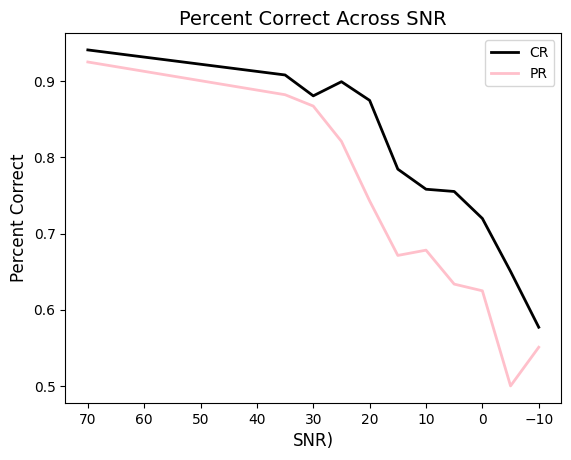

In [103]:
grouped_plots = probe_plotting_data.groupby(['group','SNR'])['PercentCorrect'].agg('mean').reset_index()
grouped_plots
CR_plot = grouped_plots[grouped_plots['group'] == 'CR']
PR_plot = grouped_plots[grouped_plots['group'] == 'PR']
fig, ax = plt.subplots()
ax1 = plt.plot(CR_plot.SNR, CR_plot.PercentCorrect, color = 'Black', linewidth = 2)
ax1 = plt.plot(PR_plot.SNR, PR_plot.PercentCorrect, color = 'Pink', linewidth = 2)
plt.legend(['CR', 'PR'])
plt.xlabel('SNR)', fontsize = 12)
plt.ylabel('Percent Correct', fontsize = 12)
plt.gca().invert_xaxis()
plt.title("Percent Correct Across SNR",fontsize = 14)
plt.savefig('Average Performance Across SNR Across Rearing')

NameError: name 'parse_stimuli' is not defined

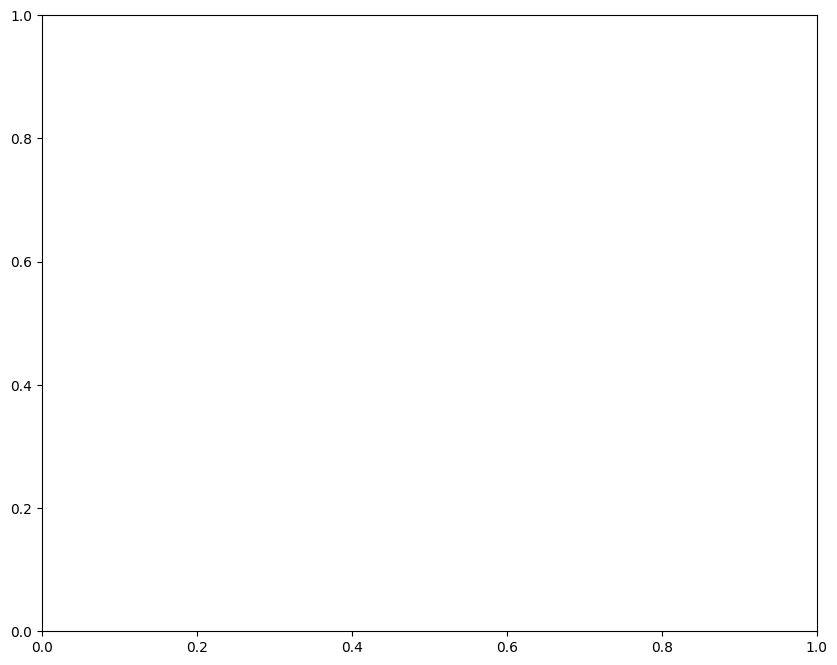

In [15]:
figure, ax = plt.subplots(figsize=(10, 8))
birds = ['C269','C280','C291', 'C293', 'C294']
rearing = ['CR', 'PR']
leg = {'CR': 'black', 'PR': 'pink'}
plotdata = {}
for idx, i in enumerate(birds):
    fulldf = pd.read_csv (i+'.csv')
    mask = fulldf['experiment'].str.contains('2ac-probe')
    data = fulldf[mask]
    smalldf = data[['subject','correct','response','stimulus', 'correction', 'time']]
    SNRdict = smalldf
    motif = []
    background = []
    sdB = []
    snl = []
    SNR = []
    for i in SNRdict['stimulus']:
        info = list(parse_stimuli(i))
        motif.append(info[0])
        sdB.append(info[1])
        background.append(info[2])
        snl.append(info[3])
        SNR.append(info[4])
    SNRdict['Motif'] = motif
    SNRdict['sdB'] = sdB
    SNRdict['Background'] = background
    SNRdict['snl'] = snl
    SNRdict['SNR'] = SNR
    Firsttrialdict = SNRdict
    Responsedict = Firsttrialdict[Firsttrialdict.response != 'timeout'].reset_index()
    bird_metadata = pd.read_csv('Bird_metadata.csv')
####Add rearing and location data to dataframe. Remove all noise SNRs and silence foreground
    Responsedict = Responsedict.merge(bird_metadata)
    print(Responsedict)
    ###Create Dataframe that contains percent correct across SNR###
    snrlist= sorted(set(Responsedict['SNR']),reverse=True)
    motiflist = set(Responsedict['Motif'])
    count = []
    numcorrect = []
    for i in snrlist:
        snrcolumn= Responsedict[Responsedict.SNR==i]
        trialcount = len(snrcolumn.SNR)
        num = len(snrcolumn[snrcolumn.correct==True])
        count.append(trialcount)
        numcorrect.append(num)
    analysis={'SNR':snrlist,
              'N':count,
              'Correct':numcorrect}
    analysisdf = pd.DataFrame(analysis)
    analysisdf['PercentCorrect'] = analysisdf['Correct']/analysisdf['N']
    if Responsedict['rearing'][0] == 'CR':
        c = 'black'
    else:
        c = 'pink'
    plt.plot(analysisdf.SNR, analysisdf.PercentCorrect, color = c, marker= 'o')
    plt.xlabel("SNR", fontsize = 12)
    plt.ylabel("Percent Correct",fontsize = 12)
    plt.title("Percent Correct Across SNR",fontsize = 14)
    plt.gca().invert_xaxis()
    import matplotlib.lines as mlines
    black_line = mlines.Line2D([], [], color='black', marker='o',
                          markersize=6, label='CR')
    pink_line = mlines.Line2D([], [], color='pink', marker='o',
                          markersize=6, label='PR')
    plt.legend(handles = [black_line,pink_line])
    plt.savefig('Performance Curves for Behavioral Performance Colored by Rearing')

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

      level_0  index subject  correct     response     stimulus  correction  \
0           0  23334    C269     True    peck_left  pmkimwop_30           0   
1           1  23335    C269     True    peck_left  pmkimwop_30           0   
2           2  23336    C269     True    peck_left  pmkimwop_30           0   
3           3  23337    C269     True    peck_left  pmkimwop_30           0   
4           4  23338    C269     True    peck_left  pmkimwop_30           0   
...       ...    ...     ...      ...          ...          ...         ...   
4400     6938  30272    C269     True    peck_left  pmkimwop_30           9   
4401     6953  30287    C269    False    peck_left  dhhon79k_30           0   
4402     6968  30302    C269    False  peck_center  dhhon79k_30           7   
4403     6976  30310    C269    False    peck_left  dhhon79k_30           0   
4404     6979  30313    C269    False  peck_center  pmkimwop_30           1   

                                  time     Motif  s

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

      level_0  index subject  correct    response     stimulus  correction  \
0           0  23026    C280     True   peck_left  pmkimwop_30           0   
1           1  23027    C280     True   peck_left  pmkimwop_30           0   
2           2  23028    C280     True  peck_right  dhhon79k_30           0   
3           3  23029    C280     True   peck_left  pmkimwop_30           0   
4           4  23030    C280     True   peck_left  pmkimwop_30           0   
...       ...    ...     ...      ...         ...          ...         ...   
2331     4641  27667    C280     True   peck_left  pmkimwop_30           1   
2332     4643  27669    C280     True   peck_left  pmkimwop_30           1   
2333     4645  27671    C280     True  peck_right  dhhon79k_30           1   
2334     4647  27673    C280     True  peck_right  dhhon79k_30           1   
2335     4649  27675    C280     True  peck_right  dhhon79k_30           2   

                                  time     Motif  sdB  SNR  FIR

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

      level_0  index subject  correct    response     stimulus  correction  \
0           0  27655    C291     True  peck_right  dhhon79k_30           0   
1           1  27656    C291     True   peck_left  pmkimwop_30           0   
2           2  27657    C291     True   peck_left  pmkimwop_30           0   
3           3  27658    C291     True  peck_right  dhhon79k_30           0   
4           4  27659    C291     True  peck_right  dhhon79k_30           0   
...       ...    ...     ...      ...         ...          ...         ...   
3632     7672  35327    C291     True   peck_left  pmkimwop_30           1   
3633     7674  35329    C291     True  peck_right  dhhon79k_30          12   
3634     7687  35342    C291     True   peck_left  pmkimwop_30          15   
3635     7703  35358    C291     True  peck_right  dhhon79k_30           3   
3636     7711  35366    C291    False   peck_left  dhhon79k_30           9   

                                  time     Motif  sdB  SNR  FIR

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

     level_0  index subject  correct    response     stimulus  correction  \
0          0    784    C127    False  peck_right  pmkimwop_30           0   
1          1    785    C127     True  peck_right  dhhon79k_30           1   
2          3    787    C127     True   peck_left  pmkimwop_30           1   
3          5    789    C127     True   peck_left  pmkimwop_30           1   
4          7    791    C127     True  peck_right  dhhon79k_30           1   
..       ...    ...     ...      ...         ...          ...         ...   
429      934   1718    C127     True  peck_right  dhhon79k_30          20   
430      955   1739    C127     True   peck_left  pmkimwop_30          39   
431     1045   1829    C127    False   peck_left  dhhon79k_30           0   
432     1046   1830    C127     True   peck_left  pmkimwop_30           0   
433     1047   1831    C127     True   peck_left  pmkimwop_30           2   

                                 time     Motif  sdB  SNR  FIRST_TRY group 

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

     level_0  index subject  correct    response     stimulus  correction  \
0          0   2769    C150     True  peck_right  dhhon79k_30           1   
1          2   2771    C150     True  peck_right  dhhon79k_30           1   
2          4   2773    C150     True   peck_left  pmkimwop_30           1   
3          6   2775    C150     True  peck_right  dhhon79k_30           1   
4          8   2777    C150     True   peck_left  pmkimwop_30           1   
..       ...    ...     ...      ...         ...          ...         ...   
622     1284   4053    C150     True  peck_right  dhhon79k_30           1   
623     1286   4055    C150     True   peck_left  pmkimwop_30           1   
624     1289   4058    C150    False   peck_left  dhhon79k_30           0   
625     1290   4059    C150     True   peck_left  pmkimwop_30           1   
626     1292   4061    C150     True  peck_right  dhhon79k_30           3   

                                 time     Motif  sdB  SNR  FIRST_TRY group 

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

     level_0  index subject  correct    response     stimulus  correction  \
0          0   8345    C182     True   peck_left  dhhon79k_30           1   
1          2   8347    C182     True  peck_right  pmkimwop_30           1   
2          4   8349    C182     True  peck_right  pmkimwop_30           1   
3          6   8351    C182     True   peck_left  dhhon79k_30           0   
4          7   8352    C182     True   peck_left  dhhon79k_30           1   
..       ...    ...     ...      ...         ...          ...         ...   
949     2438  10783    C182     True   peck_left  dhhon79k_30           3   
950     2442  10787    C182     True  peck_right  pmkimwop_30           3   
951     2446  10791    C182     True  peck_right  pmkimwop_30           1   
952     2448  10793    C182     True   peck_left  dhhon79k_30           1   
953     2450  10795    C182     True   peck_left  dhhon79k_30           6   

                                 time     Motif  sdB  SNR  FIRST_TRY group 

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

      level_0  index subject  correct     response     stimulus  correction  \
0           1  11524    C235     True   peck_right  pmkimwop_30           0   
1           2  11525    C235     True   peck_right  pmkimwop_30           0   
2           3  11526    C235     True   peck_right  pmkimwop_30           0   
3           4  11527    C235     True   peck_right  pmkimwop_30           0   
4           5  11528    C235     True    peck_left  dhhon79k_30           0   
...       ...    ...     ...      ...          ...          ...         ...   
4857     7567  19090    C235    False  peck_center  dhhon79k_30           0   
4858     7571  19094    C235    False  peck_center  pmkimwop_30           0   
4859     7575  19098    C235    False  peck_center  pmkimwop_30           0   
4860     7582  19105    C235     True    peck_left  dhhon79k_30           0   
4861     7590  19113    C235    False  peck_center  dhhon79k_30           0   

                                  time     Motif  s

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

      level_0  index subject  correct     response     stimulus  correction  \
0           0  24796    C293     True   peck_right  pmkimwop_30           0   
1           1  24797    C293     True    peck_left  dhhon79k_30           1   
2           3  24799    C293     True   peck_right  pmkimwop_30           0   
3           4  24800    C293     True   peck_right  pmkimwop_30           0   
4           5  24801    C293     True   peck_right  pmkimwop_30           2   
...       ...    ...     ...      ...          ...          ...         ...   
4525    16128  40924    C293    False  peck_center  pmkimwop_30           9   
4526    16187  40983    C293    False  peck_center  dhhon79k_30           0   
4527    16190  40986    C293    False  peck_center  pmkimwop_30           0   
4528    16192  40988    C293    False  peck_center  pmkimwop_30           0   
4529    16193  40989    C293     True    peck_left  dhhon79k_30           8   

                                  time     Motif  s

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

      level_0  index subject  correct    response     stimulus  correction  \
0          10  47294    C294     True   peck_left  pmkimwop_30           0   
1          11  47295    C294     True  peck_right  dhhon79k_30           0   
2          12  47296    C294     True   peck_left  pmkimwop_30           0   
3          13  47297    C294     True  peck_right  dhhon79k_30           0   
4          14  47298    C294     True  peck_right  dhhon79k_30           0   
...       ...    ...     ...      ...         ...          ...         ...   
4008    12187  59471    C294     True  peck_right  dhhon79k_30           1   
4009    12189  59473    C294     True   peck_left  pmkimwop_30           1   
4010    12191  59475    C294     True  peck_right  dhhon79k_30           1   
4011    12193  59477    C294     True   peck_left  pmkimwop_30           1   
4012    12195  59479    C294     True  peck_right  dhhon79k_30           2   

                                  time     Motif  sdB  SNR  FIR

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

    level_0  index subject  correct    response     stimulus  correction  \
0        66   6465    C152     True  peck_right  pmkimwop_30          38   
1       105   6504    C152     True  peck_right  pmkimwop_30          21   
2       127   6526    C152     True  peck_right  pmkimwop_30           1   
3       129   6528    C152     True  peck_right  pmkimwop_30           1   
4       131   6530    C152     True  peck_right  pmkimwop_30           1   
5       133   6532    C152     True  peck_right  pmkimwop_30           1   
6       135   6534    C152     True   peck_left  dhhon79k_30           1   
7       137   6536    C152     True   peck_left  dhhon79k_30           3   
8       141   6540    C152     True  peck_right  pmkimwop_30           1   
9       143   6542    C152     True  peck_right  pmkimwop_30           1   
10      145   6544    C152     True  peck_right  pmkimwop_30           1   
11      147   6546    C152     True  peck_right  pmkimwop_30           2   
12      150 

/tmp/ipykernel_1751145/2910921398.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2910921398.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2910921398.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

      level_0  index subject  correct     response     stimulus  correction  \
0           3      3    C250     True    peck_left  dhhon79k_30           0   
1           4      4    C250     True    peck_left  dhhon79k_30           0   
2           5      5    C250     True   peck_right  pmkimwop_30           5   
3          11     11    C250     True    peck_left  dhhon79k_30           0   
4          12     12    C250     True   peck_right  pmkimwop_30           5   
...       ...    ...     ...      ...          ...          ...         ...   
4689    12044  12044    C250    False  peck_center  pmkimwop_30           0   
4690    12046  12046    C250    False  peck_center  dhhon79k_30           0   
4691    12047  12047    C250     True    peck_left  dhhon79k_30           0   
4692    12050  12050    C250    False    peck_left  pmkimwop_30           0   
4693    12053  12053    C250    False    peck_left  pmkimwop_30           0   

                                  time     Motif  s

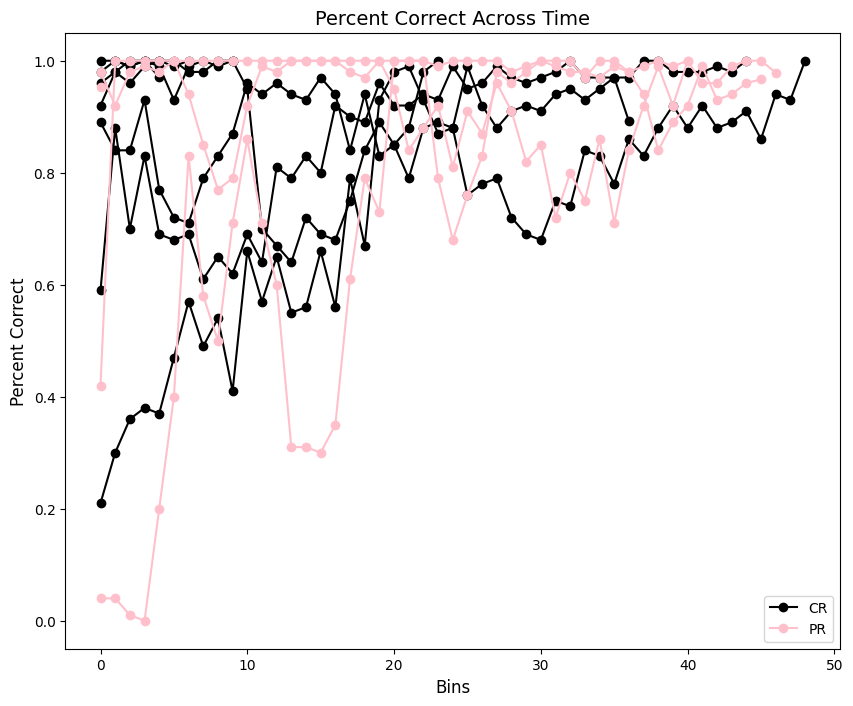

In [14]:
def parse_pretrain_stimuli (stimulus):
    stimulus_parser = parse.compile("{foreground}_{sdB:d}")
    parse_result = stimulus_parser.parse(stimulus)
    singlemotif = parse_result.named['foreground']
    sdB = parse_result.named['sdB']
    SNR = 70
    return singlemotif, sdB, SNR

figure, ax = plt.subplots(figsize=(10, 8))
birds = ['C269','C280','C291', 'C127', 'C150', 'C182', 'C235', 'C293', 'C294', 'C152', 'C250']
rearing = ['CR', 'PR']
leg = {'CR': 'black', 'PR': 'pink'}
plotdata = {}
for idx, i in enumerate(birds):
    fulldf = pd.read_csv (i+'.csv')
    mask = fulldf['experiment'].str.contains('pretrain|shaping')
    data = fulldf[mask]
    smalldf = data[['subject','correct','response','stimulus', 'correction', 'time']]
    SNRdict = smalldf
    motif = []
    sdB = []
    SNR = []
    for i in SNRdict['stimulus']:
        info = list(parse_pretrain_stimuli(i))
        motif.append(info[0])
        sdB.append(info[1])
        SNR.append(info[2])

    SNRdict['Motif'] = motif
    SNRdict['sdB'] = sdB
    SNRdict['SNR'] = SNR
    
    tracker = True
    subjects = SNRdict['subject'].unique()
    first_try_df = pd.DataFrame()
    for i in subjects:
        minigrb =  SNRdict[SNRdict.subject==i].reset_index()
        minigrb['FIRST_TRY']=0
        for index, trial  in minigrb[::-1].iterrows(): # This condition has to come first:
            if trial.correction == 0:
                tracker = True
        # So that these can be evaluated correctly
            if (trial['correction']==0) & (trial['response']!='timeout'):
                minigrb.loc[index, 'FIRST_TRY'] = 1
                tracker = False
            if (trial['correction']!=0) & (trial['response']!='timeout') & tracker:
                minigrb.loc[index, 'FIRST_TRY'] = 1
                tracker = False 
    first_try_df =  first_try_df.append(minigrb)
    Firsttrialdict = first_try_df[first_try_df.FIRST_TRY == 1]
    Responsedict = Firsttrialdict[Firsttrialdict.response != 'timeout'].reset_index()
    bird_metadata = pd.read_csv('behavior_metadata.csv')
####Add rearing and location data to dataframe. Remove all noise SNRs and silence foreground
    Responsedict = Responsedict.merge(bird_metadata)
    print(Responsedict)
#     ###Create Dataframe that contains percent correct across SNR###
    subjects = Responsedict['subject'].unique()
    for s in subjects:
        prac_df = Responsedict[Responsedict['subject']==s]
        wonkybin = len(prac_df)%100
        num_bins = len(prac_df)//100
        count = []
        numcorrect = []
        wonkybinneddata = prac_df.iloc[0:wonkybin]
        trialcount = len(wonkybinneddata.SNR)
        num = len(wonkybinneddata[wonkybinneddata.correct==True])
        count.append(trialcount)
        numcorrect.append(num)

        for i in range(num_bins):
            binneddata = prac_df.iloc[wonkybin+(i)*100:wonkybin+(i+1)*100]
            trialcount = len(binneddata.SNR)
            num = len(binneddata[binneddata.correct==True])
            count.append(trialcount)
            numcorrect.append(num)

        count = count[::-1]
        numcorrect = numcorrect[::-1]
        analysis={'bin':range(num_bins+1),
              'N':count,
              'Correct':numcorrect,
              }

    print (analysis)
    analysisdf = pd.DataFrame(analysis)
    analysisdf['PercentCorrect'] = analysisdf['Correct']/analysisdf['N']
    analysisdf
    if Responsedict['group'][0] == 'CR':
        c = 'black'
    else:
        c = 'pink'
    plt.plot(analysisdf.bin, analysisdf.PercentCorrect, color = c, marker= 'o')
    plt.xlabel("Bins", fontsize = 12)
    plt.ylabel("Percent Correct",fontsize = 12)
    plt.title("Percent Correct Across Time",fontsize = 14)
    
    import matplotlib.lines as mlines
    black_line = mlines.Line2D([], [], color='black', marker='o',
                          markersize=6, label='CR')
    pink_line = mlines.Line2D([], [], color='pink', marker='o',
                          markersize=6, label='PR')
    plt.legend(handles = [black_line,pink_line])
    plt.savefig('Performance Curves for Pretrain Behavioral Performance Colored by Rearing')

/tmp/ipykernel_1751145/2830962205.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2830962205.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['sdB'] = sdB
/tmp/ipykernel_1751145/2830962205.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

/tmp/ipykernel_1751145/2830962205.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_try_df =  first_try_df.append(minigrb)
/tmp/ipykernel_1751145/2830962205.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plotting_table = plotting_table.append(analysisdf)
/tmp/ipykernel_1751145/2830962205.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SNRdict['Motif'] = motif
/tmp/ipykernel_1751145/2830962205.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

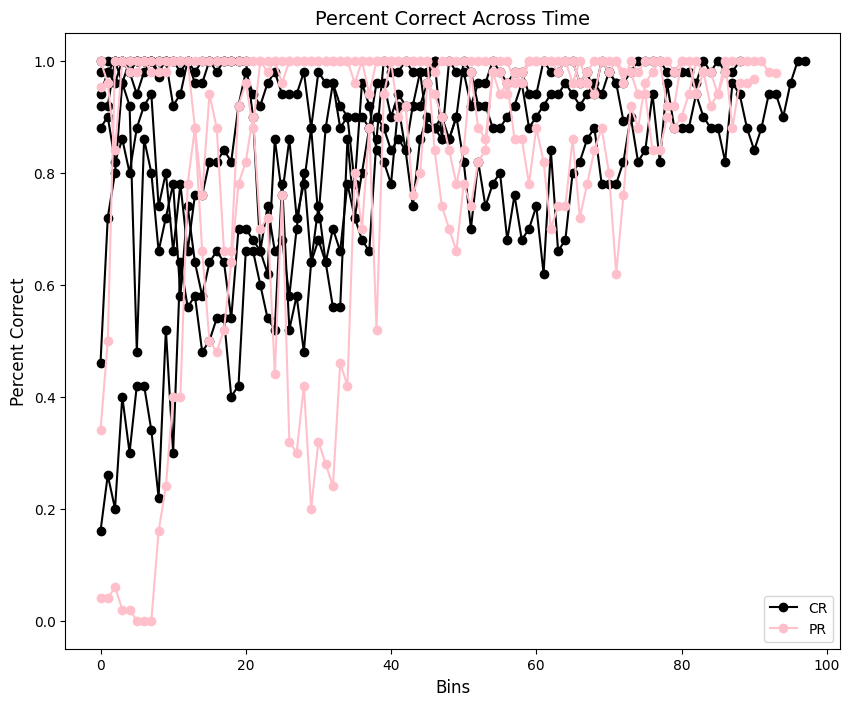

In [59]:
def parse_pretrain_stimuli (stimulus):
    stimulus_parser = parse.compile("{foreground}_{sdB:d}")
    parse_result = stimulus_parser.parse(stimulus)
    singlemotif = parse_result.named['foreground']
    sdB = parse_result.named['sdB']
    SNR = 70
    return singlemotif, sdB, SNR
plotting_table = pd.DataFrame()
figure, ax = plt.subplots(figsize=(10, 8))
birds = ['C269','C280','C291', 'C127', 'C150', 'C182', 'C235', 'C293', 'C294', 'C152', 'C250']
rearing = ['CR', 'PR']
leg = {'CR': 'black', 'PR': 'pink'}
plotdata = {}
for idx, i in enumerate(birds):
    fulldf = pd.read_csv (i+'.csv')
    mask = fulldf['experiment'].str.contains('pretrain|shaping')
    data = fulldf[mask]
    smalldf = data[['subject','correct','response','stimulus', 'correction', 'time']]
    SNRdict = smalldf
    motif = []
    sdB = []
    SNR = []
    for i in SNRdict['stimulus']:
        info = list(parse_pretrain_stimuli(i))
        motif.append(info[0])
        sdB.append(info[1])
        SNR.append(info[2])

    SNRdict['Motif'] = motif
    SNRdict['sdB'] = sdB
    SNRdict['SNR'] = SNR
    
    tracker = True
    subjects = SNRdict['subject'].unique()
    first_try_df = pd.DataFrame()
    for i in subjects:
        minigrb =  SNRdict[SNRdict.subject==i].reset_index()
        minigrb['FIRST_TRY']=0
        for index, trial  in minigrb[::-1].iterrows(): # This condition has to come first:
            if trial.correction == 0:
                tracker = True
        # So that these can be evaluated correctly
            if (trial['correction']==0) & (trial['response']!='timeout'):
                minigrb.loc[index, 'FIRST_TRY'] = 1
                tracker = False
            if (trial['correction']!=0) & (trial['response']!='timeout') & tracker:
                minigrb.loc[index, 'FIRST_TRY'] = 1
                tracker = False 
    first_try_df =  first_try_df.append(minigrb)
    Firsttrialdict = first_try_df[first_try_df.FIRST_TRY == 1]
    Responsedict = Firsttrialdict[Firsttrialdict.response != 'timeout'].reset_index()
    bird_metadata = pd.read_csv('behavior_metadata.csv')
####Add rearing and location data to dataframe. Remove all noise SNRs and silence foreground
    Responsedict = Responsedict.merge(bird_metadata)
#     ###Create Dataframe that contains percent correct across SNR###
    subjects = Responsedict['subject'].unique()
    for s in subjects:
        prac_df = Responsedict[Responsedict['subject']==s]
        wonkybin = len(prac_df)%50
        num_bins = len(prac_df)//50
        count = []
        numcorrect = []
        wonkybinneddata = prac_df.iloc[0:wonkybin]
        trialcount = len(wonkybinneddata.SNR)
        num = len(wonkybinneddata[wonkybinneddata.correct==True])
        count.append(trialcount)
        numcorrect.append(num)

        for i in range(num_bins):
            binneddata = prac_df.iloc[wonkybin+(i)*50:wonkybin+(i+1)*50]
            trialcount = len(binneddata.SNR)
            num = len(binneddata[binneddata.correct==True])
            count.append(trialcount)
            numcorrect.append(num)

        count = count[::-1]
        numcorrect = numcorrect[::-1]
        analysis={'subject': s,
                  'group': prac_df['group'][0],
                  'bin':range(num_bins+1),
              'N':count,
              'Correct':numcorrect,
              }

    analysisdf = pd.DataFrame(analysis)
    analysisdf['PercentCorrect'] = analysisdf['Correct']/analysisdf['N']
    plotting_table = plotting_table.append(analysisdf)
    if Responsedict['group'][0] == 'CR':
        c = 'black'
    else:
        c = 'pink'
    plt.plot(analysisdf.bin, analysisdf.PercentCorrect, color = c, marker= 'o')
    plt.xlabel("Bins", fontsize = 12)
    plt.ylabel("Percent Correct",fontsize = 12)
    plt.title("Percent Correct Across Time",fontsize = 14)
    
    import matplotlib.lines as mlines
    black_line = mlines.Line2D([], [], color='black', marker='o',
                          markersize=6, label='CR')
    pink_line = mlines.Line2D([], [], color='pink', marker='o',
                          markersize=6, label='PR')
    plt.legend(handles = [black_line,pink_line])
    plt.savefig('Performance Curves for Behavioral Performance Colored by Rearing')

Text(0, 0.5, 'percent correct')

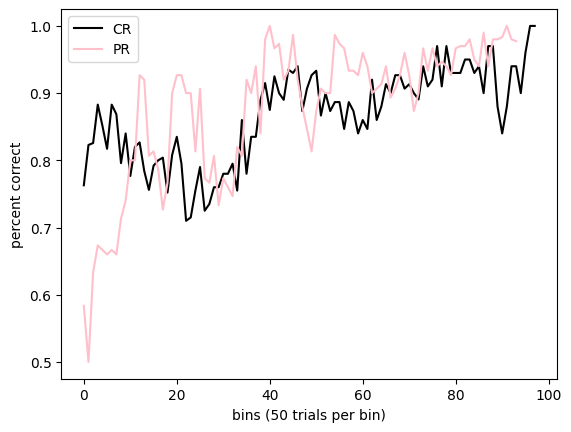

In [64]:
grouped_plots = plotting_table.groupby(['group','bin'])['PercentCorrect'].agg('mean').reset_index()
grouped_plots
CR_plot = grouped_plots[grouped_plots['group'] == 'CR']
PR_plot = grouped_plots[grouped_plots['group'] == 'PR']
fig, ax = plt.subplots()
ax1 = plt.plot(CR_plot.bin, CR_plot.PercentCorrect, color = 'Black')
ax1 = plt.plot(PR_plot.bin, PR_plot.PercentCorrect, color = 'Pink')
plt.legend(['CR', 'PR'])
plt.xlabel('bins (50 trials per bin)')
plt.ylabel('percent correct')